In [ ]:
## export dataset in octave
# load('ex5data.mat')
# csvwrite('training.csv',[X,y])
# csvwrite('cross_validation.csv',[Xval,yval])
# csvwrite('test.csv',[Xtest,ytest])

In [13]:
# load dataset
import pandas as pd
training_data = pd.read_csv('training.csv',header=None)
cross_validation = pd.read_csv('cross_validation.csv',header=None)
test= pd.read_csv('test.csv',header=None)


In [14]:
import numpy as np
x = training_data.as_matrix([0]);
y = training_data.as_matrix([1]);
x_cv = cross_validation.as_matrix([0])
y_cv = cross_validation.as_matrix([1])
x_test = test.as_matrix([0])
y_test = test.as_matrix([1])

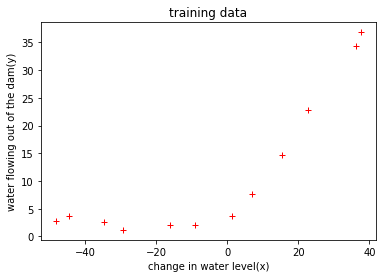

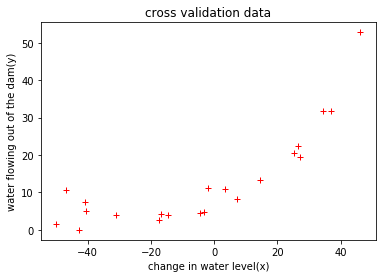

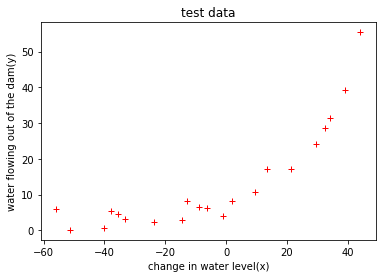

In [15]:
from matplotlib import pyplot as plt

def plotData(x,y,title):
    plt.plot(x,y,'r+')
    plt.xlabel('change in water level(x)')
    plt.ylabel('water flowing out of the dam(y)')
    plt.title(title)
    plt.show()
    
plotData(x,y,'training data')
plotData(x_cv,y_cv,'cross validation data')
plotData(x_test,y_test, 'test data')

In [16]:
from sklearn import linear_model

reg = linear_model.LinearRegression();
reg.fit(x,y);

print('coef: ', reg.coef_)
print('intercept: ', reg.intercept_)

coef:  [[0.36777923]]
intercept:  [13.08790351]


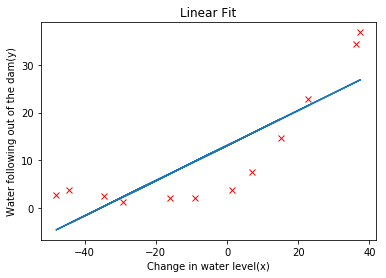

In [19]:
y_predict = reg.predict(x)

def plotFit(x,y,y_predict):
    plt.plot( x, y,'rx', x, y_predict, '-');
    plt.xlabel('Change in water level(x)')
    plt.ylabel('Water following out of the dam(y)')
    plt.title('Linear Fit')
    plt.show();
plotFit(x,y,y_predict)

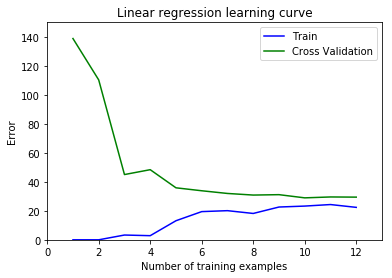

In [49]:
def calcError(ypredict, y):
    m = len(y)
    return 1/(2*m) * sum((ypredict-y)**2)[0]

def learnCurve(x,y,x_cv,y_cv):
    reg = linear_model.LinearRegression();
    reg.fit(x,y);
    
    y_predict = reg.predict(x)
    y_cv_predict = reg.predict(x_cv)
    
    training_error = calcError(y_predict,y)
    cv_error = calcError(y_cv_predict, y_cv)
    
    return training_error, cv_error

def calcLearnCurve(x,y,x_cv,y_cv):
    n = len(x)
    t_errors = []
    cv_errors = []
    for i in range(1,n+1):
        x_range = x[:i]
        y_range = y[:i]
        t_error,cv_error = learnCurve(x_range,y_range,x_cv,y_cv)
        t_errors.append(t_error)
        cv_errors.append(cv_error)
    return t_errors, cv_errors

def plotLearnCurve(t_errors,cv_errors):
    x = np.arange(1,len(t_errors)+1)
    plt.plot(x,t_errors,'b',x,cv_errors,'g')
    plt.xlabel('Number of training examples')
    plt.axis([0,13,0,150])
    plt.ylabel('Error')
    plt.legend(['Train','Cross Validation'])
    plt.title('Linear regression learning curve')
    plt.show()
    
t_errors, cv_errors = calcLearnCurve(x,y,x_cv,y_cv)
plotLearnCurve(t_errors, cv_errors)
    

In [42]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])